# Kullback-Leibler divergence, no tears

The Kullback-Leibler divergence (KLD) measures the distance between two probability distributions, $Q$ and $P$. KLD between $Q$ and $P$ is defined as follows.

* $D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$
* $D_{\mathrm{KL}}(P\|Q) \geq 0$

The way to interpret the value of KLD is

* as the KLD is closer to zero, $P$ and $Q$ are more similar
* as the KLD is moves away from zero, $P$ and $Q$ are more dissimilar (diverging, more distant)

In the example below, we will calculate KLD against three distributions, each associated with different models. Model 1 takes on the following form.

* $X_1 \sim \mathcal{N}(0, 1)$
* $X_2 \sim \mathcal{N}(1, 1)$
* $X_3 \sim \mathcal{N}(2 + 0.8x_1 - 0.2x_2, 1)$

Model 2 takes on the following form.

* $X_1 \sim \mathcal{N}(0.85, 1)$
* $X_2 \sim \mathcal{N}(1.05, 1)$
* $X_3 \sim \mathcal{N}(2 + 0.9x_1 - 0.25x_2, 1)$

Model 3 takes on the following form.

* $X_1 \sim \mathcal{N}(2, 1)$
* $X_2 \sim \mathcal{N}(5, 1)$
* $X_3 \sim \mathcal{N}(4 + 0.8x_1 - 0.8x_2, 1)$


Note how Models 1 and 2 were constructed to be very similar, and Model 3 to be very dissimilar to Models 1 and 2.

In [10]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from numpy.random import normal
from scipy.stats import multivariate_normal, norm, entropy

np.random.seed(37)
sns.set_style('whitegrid')
num_samples = 1000

x1 = normal(0, 1, num_samples)
x2 = normal(1, 1, num_samples)
x3 = normal(2 + 0.8 * x1 - 0.2 * x2, 1, num_samples)

data1 = data = np.column_stack((x1, x2, x3))
means1 = data1.mean(axis=0)
covs1 = np.cov(data1, rowvar=False)

x1 = normal(0.85, 1, num_samples)
x2 = normal(1.05, 1, num_samples)
x3 = normal(2 + 0.9 * x1 - 0.25 * x2, 1, num_samples)

data2 = np.column_stack((x1, x2, x3))
means2 = data2.mean(axis=0)
covs2 = np.cov(data2, rowvar=False)

x1 = normal(2, 1, num_samples)
x2 = normal(5, 1, num_samples)
x3 = normal(4 + 0.8 * x1 - 0.8 * x2, 1, num_samples)

data3 = np.column_stack((x1, x2, x3))
means3 = data3.mean(axis=0)
covs3 = np.cov(data3, rowvar=False)

print('means_1 = {}'.format(means1))
print('covariance_1')
print(covs1)
print('')
print('means_2 = {}'.format(means2))
print('covariance_2')
print(covs2)
print('')
print('means_3 = {}'.format(means3))
print('covariance_3')
print(covs3)

means_1 = [0.01277839 0.9839153  1.80334137]
covariance_1
[[ 0.9634615  -0.00371354  0.76022725]
 [-0.00371354  0.97865653 -0.25181086]
 [ 0.76022725 -0.25181086  1.63064517]]

means_2 = [0.85083876 1.07957661 2.46909572]
covariance_2
[[ 1.00406579  0.03774339  0.91788487]
 [ 0.03774339  1.00889847 -0.21973076]
 [ 0.91788487 -0.21973076  1.94124604]]

means_3 = [2.00362816 4.97508849 1.65194765]
covariance_3
[[ 1.01322936  0.0112429   0.75369598]
 [ 0.0112429   0.96736793 -0.76265399]
 [ 0.75369598 -0.76265399  2.14695264]]


Note how we estimate the means and covariance matrix of Models 1 and 2 from the sampled data. For any observation, ${\mathbf X} = (x_{1}, \ldots, x_{k})$, we can compute the probablity of such data point according to the following probability density function.

$
\begin{align}
f_{\mathbf X}(x_1,\ldots,x_k)
& = \frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}
\end{align}
$

Let's visualize the density curves of each variable in the models.

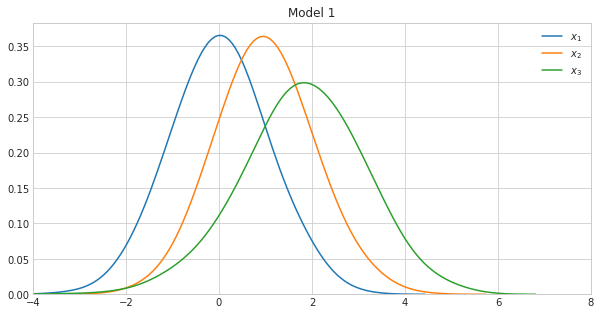

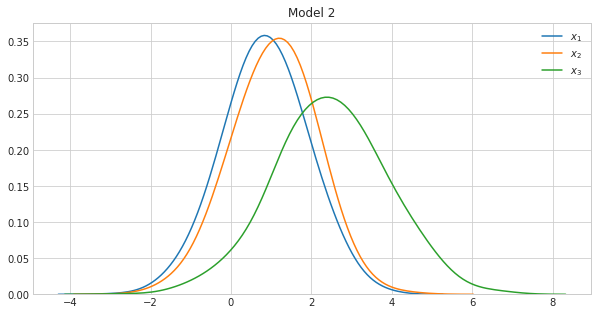

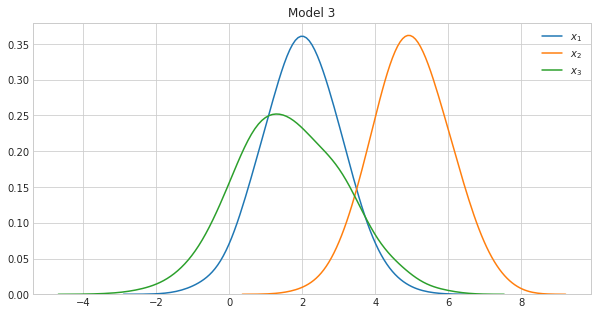

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Model 1')
ax.set_xlim([-4, 8])
sns.kdeplot(data1[:,0], bw=0.5, ax=ax, label=r'$x_{1}$')
sns.kdeplot(data1[:,1], bw=0.5, ax=ax, label=r'$x_{2}$')
sns.kdeplot(data1[:,2], bw=0.5, ax=ax, label=r'$x_{3}$')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Model 2')
ax.set_xlim([-4, 8])
sns.kdeplot(data2[:,0], bw=0.5, ax=ax, label=r'$x_{1}$')
sns.kdeplot(data2[:,1], bw=0.5, ax=ax, label=r'$x_{2}$')
sns.kdeplot(data2[:,2], bw=0.5, ax=ax, label=r'$x_{3}$')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Model 3')
ax.set_xlim([-4, 8])
sns.kdeplot(data3[:,0], bw=0.5, ax=ax, label=r'$x_{1}$')
sns.kdeplot(data3[:,1], bw=0.5, ax=ax, label=r'$x_{2}$')
sns.kdeplot(data3[:,2], bw=0.5, ax=ax, label=r'$x_{3}$')

Now that we have estimated the parameters (means and covariance matrix) of the models, we can plug these back into the density function above to estimate the probability of each data point in the data simulated from Model 1. Note that $P$ is the density function associated with Model 1, $Q1$ is the density function associated with Model 2, and $Q2$ is the density function associated with Model 3. Also note

* $D_{\mathrm{KL}}(P\|P) = 0$
* $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ (the KLD is asymmetric)

In [12]:
P = multivariate_normal.pdf(data1, mean=means1, cov=covs1)
Q1 = multivariate_normal.pdf(data1, mean=means2, cov=covs2)
Q2 = multivariate_normal.pdf(data1, mean=means3, cov=covs3)

print(entropy(P, P))
print(entropy(P, Q1))
print(entropy(P, Q2))

0.0
0.17877316564929518
6.628549732040817


This time around, $P$ is the density function associated with Model 2 and $Q1$ is the density function associated with Model 1 and $Q2$ with Model 3.

In [13]:
P = multivariate_normal.pdf(data2, mean=means2, cov=covs2)
Q1 = multivariate_normal.pdf(data2, mean=means1, cov=covs1)
Q2 = multivariate_normal.pdf(data2, mean=means3, cov=covs3)

print(entropy(P, P))
print(entropy(P, Q1))
print(entropy(P, Q2))

0.0
0.1857262834508341
5.25177161508009


Finally, $P$ is the density function associated with Model 3 and $Q1$ is the density function associated with Model 1 and $Q2$ with Model 2.

In [14]:
P = multivariate_normal.pdf(data3, mean=means3, cov=covs3)
Q1 = multivariate_normal.pdf(data3, mean=means1, cov=covs1)
Q2 = multivariate_normal.pdf(data3, mean=means2, cov=covs2)

print(entropy(P, P))
print(entropy(P, Q1))
print(entropy(P, Q2))

0.0
4.964071493531684
4.154646297473443


Since Models 1 and 2 are very similar (as can be seen by how we constructed them), their KLD is closer to zero. On the other hand the KLDs between these two models and Model 3 are farther from zero. Though, it is interesting to note, that Model 2 is closer to Model 3 than Model 1 is to Model 3.